In [ ]:
# downloading datset
!gdown 1VA_L4QlY8za46j3WfIWZZ-d8XOTZ7XKm

Downloading...
From: https://drive.google.com/uc?id=1VA_L4QlY8za46j3WfIWZZ-d8XOTZ7XKm
To: /content/supermarket.csv
100% 1.16M/1.16M [00:00<00:00, 119MB/s]


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the datat
super = pd.read_csv('supermarket.csv')
super.head()

,Customer Id,Date,Product
0,JKML5ZWXP0XQ,2020-07-20,tropical fruit
1,YOGWQIUPDAJ7,2020-04-30,whole milk
2,Q3NL22281AF6,2020-09-18,pip fruit
3,C59GRTLMZQAU,2020-12-11,other vegetables
4,WUSF8LTEQZ5L,2020-01-02,whole milk


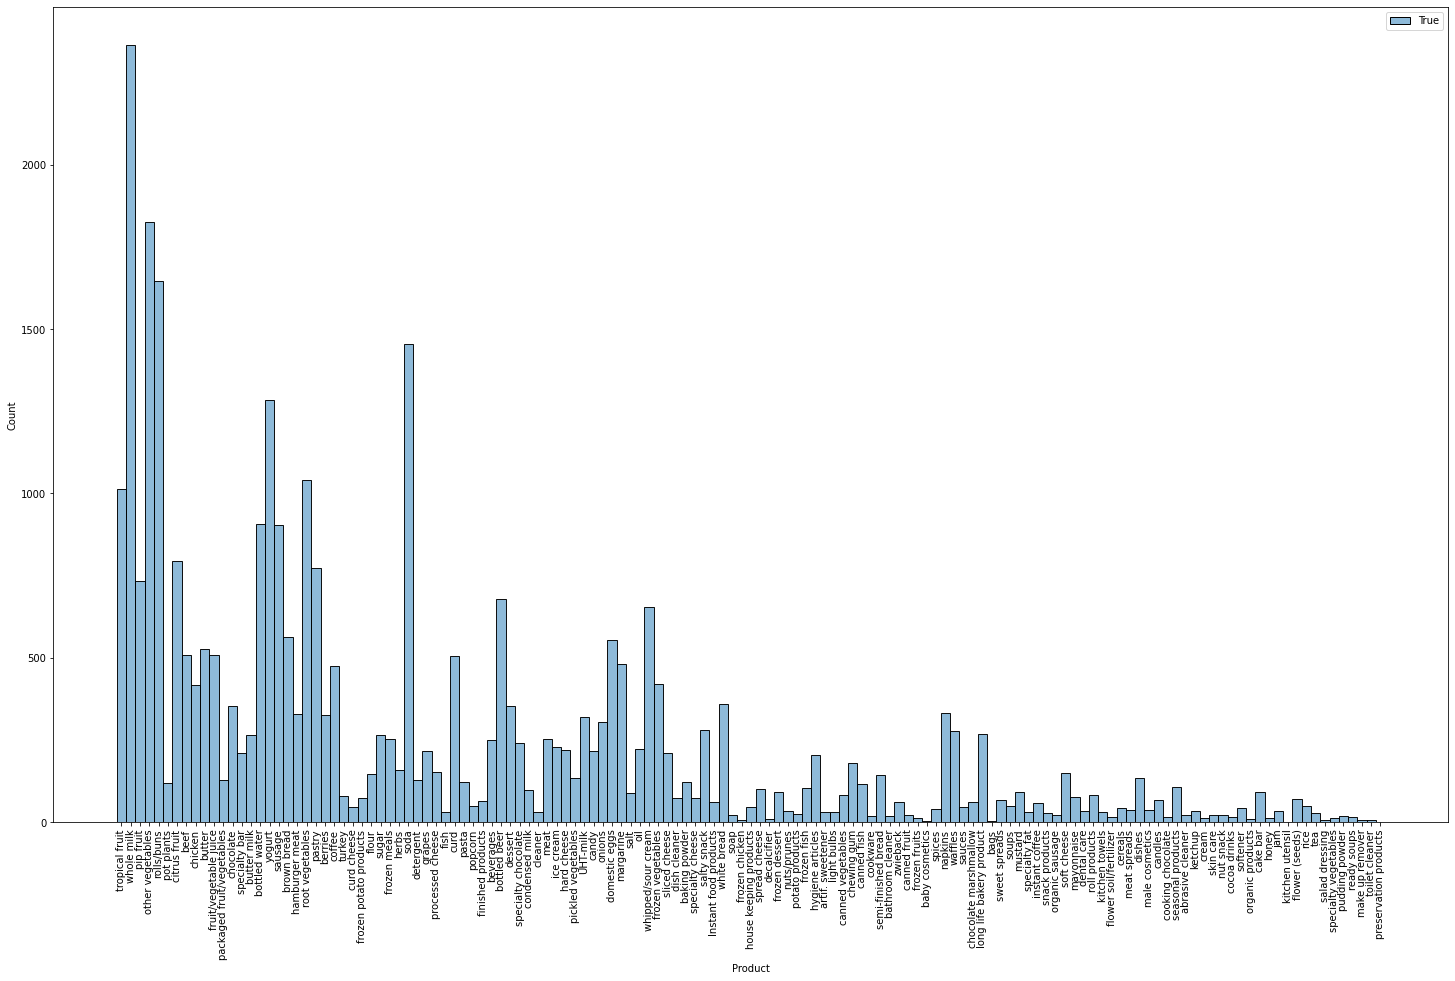

In [ ]:
plt.figure(figsize=(25,15))
sns.histplot(x=super['Product'], hue=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 1: the number of unique product
print('No. of unique Product',len(set(super.Product)), '\n')

# 2: the average of sales per day
print('Mean Sales per day', super.groupby(['Date'])['Product'].count().mean(), '\n')

# 3: lesst favorite products
print('Less favorite Products', super.groupby(['Product'])['Product'].count().sort_values()[-5:], '\n')

# 4: find 5 loyalest customers in 2020
unique_pair = super[['Customer Id','Date']].drop_duplicates()
unique_pair['year'] = pd.DatetimeIndex(unique_pair['Date']).year
loyal_customers_2020 = unique_pair[unique_pair['year']==2020]
print('loyal customers in 2020', loyal_customers_2020.groupby(['Customer Id'])['Date'].count().sort_values()[-5:], '\n')

# 5: the day of the week with the most sales --> Monday=0
super['Date_to_weekday'] = pd.DatetimeIndex(super['Date']).date
super['weekday'] = [i.weekday() for i in super.Date_to_weekday]
print('No. of sales in days of the week', super.groupby(['weekday'])['weekday'].count().sort_values()[-1:], '\n')

No. of unique Product 137 

Mean Sales per day 44.93131868131868 

Less favorite Products Product
yogurt              1285
soda                1453
rolls/buns          1646
other vegetables    1827
whole milk          2363
Name: Product, dtype: int64 

loyal customers in 2020 Customer Id
E7FD9BU4OK0F    7
M2DT2Z00NQCH    7
M722MPITBY07    7
0ZRF32AJ06BC    7
QBUS9NZY39BE    7
Name: Date, dtype: int64 

No. of sales in days of the week weekday
2    4846
Name: weekday, dtype: int64 



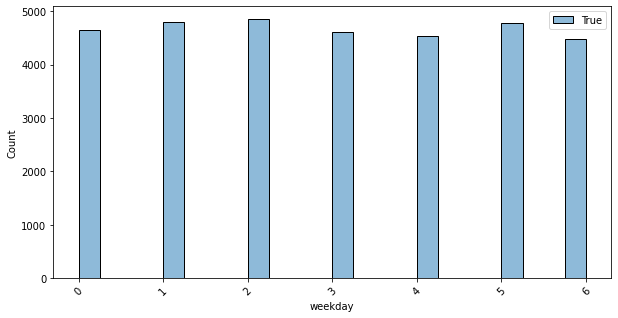

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=super['weekday'], hue=True)
plt.xticks(rotation=45)
plt.show()

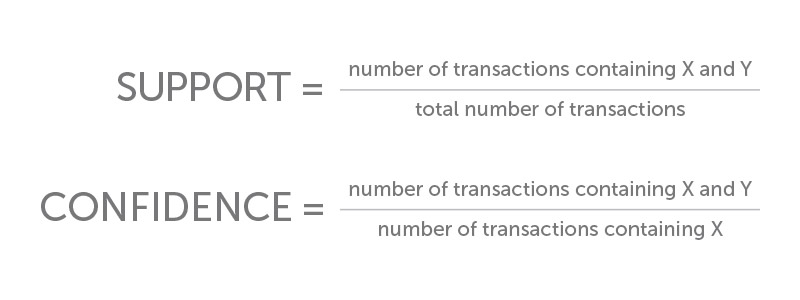

In [ ]:
# support

# 6: find the 5 produt with the most support
support = super.drop(['Date_to_weekday', 'weekday'], axis=1)
support['Product'] = support['Product'].astype(str) + ','
support = pd.DataFrame(support.groupby(['Customer Id','Date'], as_index=False)['Product'].sum())
support['New_Product'] = [i.split(',') for i in support.Product]
produc_name = list(set(super['Product']))

# make dict of product with 0 support first
support_dict = {i:0 for i in produc_name}

# calculate the support of each product
for k in support_dict.keys():
  for i in support['New_Product']:
    if k in i:
      support_dict[k]+=1
for k in support_dict.keys():
  support_dict[k]/=14753

# sort dict value to find 5 produt with the most support
sorted_dict = dict(sorted(support_dict.items(), key=lambda item: item[1]))
print(sorted_dict)

{'preservation products': 6.778282383244086e-05, 'kitchen utensil': 6.778282383244086e-05, 'baby cosmetics': 0.00020334847149732258, 'bags': 0.00027113129532976344, 'toilet cleaner': 0.0003389141191622043, 'frozen chicken': 0.0003389141191622043, 'make up remover': 0.0003389141191622043, 'salad dressing': 0.00040669694299464516, 'decalcifier': 0.0006100454144919677, 'organic products': 0.0006778282383244086, 'frozen fruits': 0.0007456110621568494, 'specialty vegetables': 0.0007456110621568494, 'cream': 0.0008133938859892903, 'honey': 0.0008811767098217311, 'cooking chocolate': 0.001016742357486613, 'ready soups': 0.001016742357486613, 'flower soil/fertilizer': 0.0010845251813190538, 'cocoa drinks': 0.0010845251813190538, 'cookware': 0.0011523080051514946, 'bathroom cleaner': 0.0011523080051514946, 'pudding powder': 0.0011523080051514946, 'soap': 0.0013556564766488172, 'skin care': 0.0013556564766488172, 'canned fruit': 0.001423439300481258, 'organic sausage': 0.0014912221243136988, 'ab

In [ ]:
super.sort_values(by='Customer Id')

,Customer Id,Date,Product,Date_to_weekday,weekday
17632,0011457U6R3Y,2020-10-13,brown bread,2020-10-13,1
20674,0011457U6R3Y,2020-10-13,dessert,2020-10-13,1
3748,0011457U6R3Y,2020-10-13,rolls/buns,2020-10-13,1
23017,008J5Z3CJPYU,2019-01-27,flour,2019-01-27,6
28548,008J5Z3CJPYU,2019-06-12,salty snack,2019-06-12,2
...,...,...,...,...,...
2122,ZZRT1GFUKTZ7,2020-07-30,other vegetables,2020-07-30,3
26631,ZZRT1GFUKTZ7,2019-11-12,specialty fat,2019-11-12,1
12754,ZZRT1GFUKTZ7,2019-11-12,candy,2019-11-12,1
26737,ZZRT1GFUKTZ7,2019-03-30,dishes,2019-03-30,5


In [ ]:
support.head(5)

,Customer Id,Date,Product,New_Product
0,0011457U6R3Y,2020-10-13,"rolls/buns,brown bread,dessert,","[rolls/buns, brown bread, dessert, ]"
1,008J5Z3CJPYU,2019-01-27,"root vegetables,flour,","[root vegetables, flour, ]"
2,008J5Z3CJPYU,2019-06-12,"salty snack,bottled beer,","[salty snack, bottled beer, ]"
3,008J5Z3CJPYU,2019-10-17,"domestic eggs,","[domestic eggs, ]"
4,008J5Z3CJPYU,2019-10-28,"white bread,","[white bread, ]"


In [ ]:
support[support['Customer Id'] == 'ZZRT1GFUKTZ7']

,Customer Id,Date,Product,New_Product
14747,ZZRT1GFUKTZ7,2019-01-16,"whole milk,","[whole milk, ]"
14748,ZZRT1GFUKTZ7,2019-03-30,"whole milk,dishes,","[whole milk, dishes, ]"
14749,ZZRT1GFUKTZ7,2019-11-12,"candy,specialty fat,","[candy, specialty fat, ]"
14750,ZZRT1GFUKTZ7,2019-12-28,"UHT-milk,other vegetables,","[UHT-milk, other vegetables, ]"
14751,ZZRT1GFUKTZ7,2020-06-13,"hamburger meat,","[hamburger meat, ]"
14752,ZZRT1GFUKTZ7,2020-07-30,"other vegetables,bottled water,","[other vegetables, bottled water, ]"


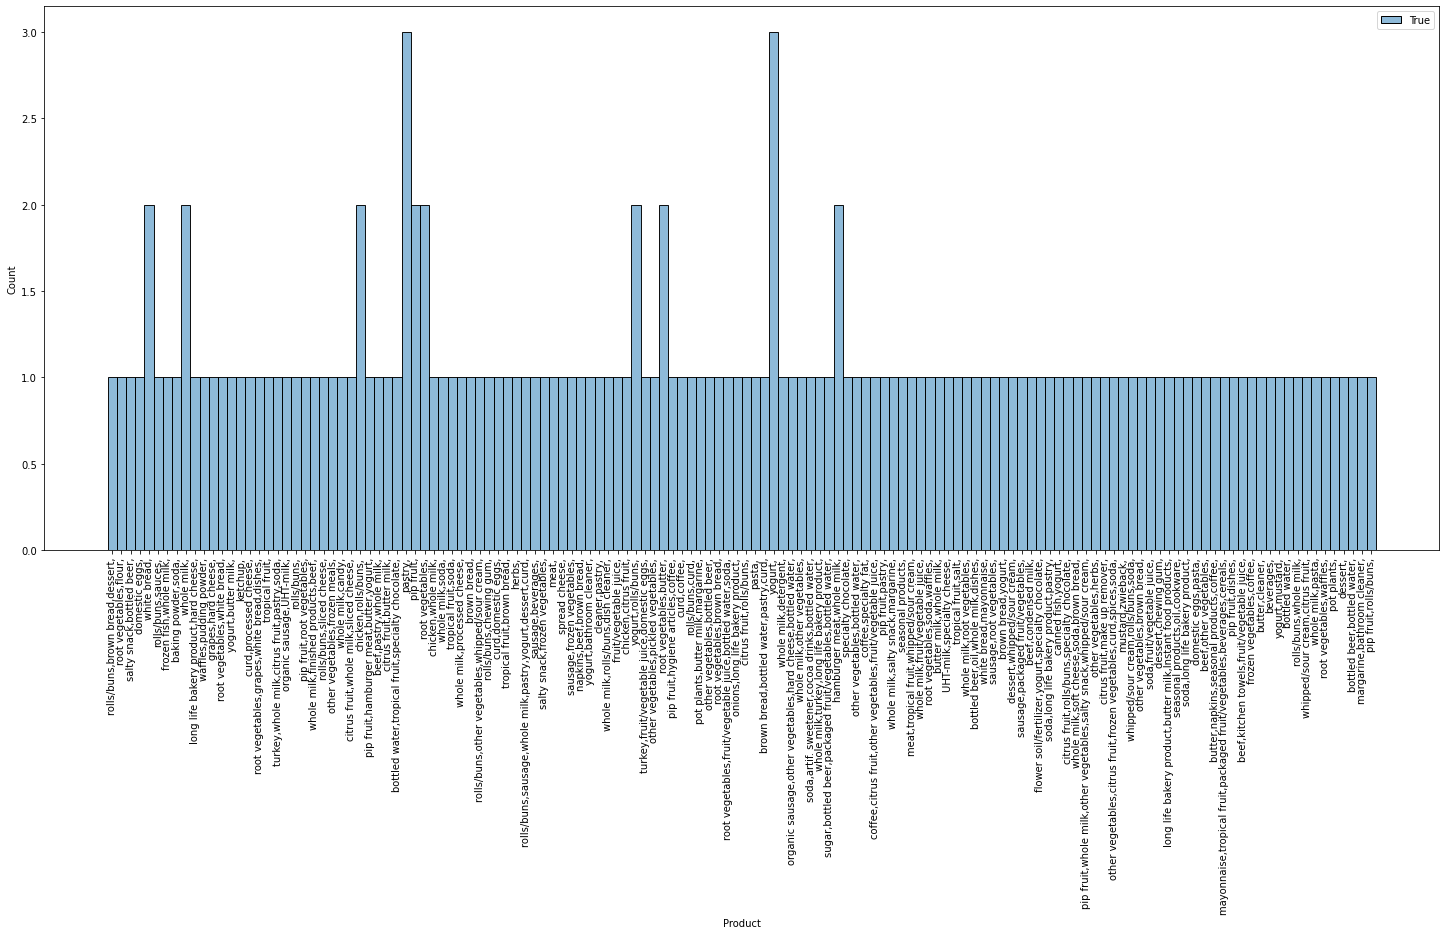

In [ ]:
plt.figure(figsize=(25,10))
sns.histplot(x=support['Product'][:150], hue=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# confidence

# make a data frame with pair-products in it's indexes
pair_produc_name = []
for i in list(set(super['Product'])):
  for j in list(set(super['Product'])):
    if sorted_dict[i]>=0.01 and sorted_dict[j]>=0.01 and i!=j and (i,j) not in pair_produc_name and (j,i) not in pair_produc_name:
      pair_produc_name.append((i,j))
confidence_df = pd.DataFrame({'pair_product' : pair_produc_name})

# make dict of pair-products with 0 support
support_pair_product = {i:0 for i in confidence_df['pair_product']}

# calculate the support of each pair-products to add in a column of confidence_df dataframe
for k in support_pair_product.keys():
  for g in support['New_Product']:
    if k[0] in g and k[1] in g:
      support_pair_product[k]+=1
confidence_df['support_pair_items'] = list(support_pair_product.values())
confidence_df.head(5)

,pair_product,support_pair_items
0,"(pip fruit, domestic eggs)",13
1,"(pip fruit, whipped/sour cream)",25
2,"(pip fruit, whole milk)",99
3,"(pip fruit, frozen vegetables)",20
4,"(pip fruit, specialty bar)",8


In [ ]:
# add one column for each product in confidence_df data frame
for i in list(set(super['Product'])):
  confidence_df[str(i)] = [0 for j in range(len(confidence_df))]

# calculate the support of each triple-products to add in products columns of confidence_df dataframe
for i in tqdm(confidence_df.columns[2:]):
  for j in confidence_df['pair_product']:
    for k in support['New_Product']:
      if i in k and j[0] in k and j[1] in k:
        confidence_df[str(i)][confidence_df.index[confidence_df['pair_product'] == j]]+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/137 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
confidence_df

,pair_product,support_pair_items,popcorn,pip fruit,fish,preservation products,domestic eggs,cooking chocolate,whipped/sour cream,turkey,...,nut snack,cocoa drinks,flour,candy,rice,frozen dessert,cleaner,decalcifier,kitchen towels,pastry
0,"(pip fruit, domestic eggs)",13,0.000000,1.000000,0.0,0.0,1.000000,0.0,0.076923,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.076923
1,"(pip fruit, whipped/sour cream)",25,0.000000,1.000000,0.0,0.0,0.040000,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,"(pip fruit, whole milk)",99,0.010101,1.000000,0.0,0.0,0.000000,0.0,0.060606,0.0,...,0.0,0.0,0.0,0.020202,0.0,0.010101,0.0,0.0,0.0,0.030303
3,"(pip fruit, frozen vegetables)",20,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.050000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,"(pip fruit, specialty bar)",8,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,"(other vegetables, candy)",17,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1374,"(other vegetables, pastry)",55,0.000000,0.018182,0.0,0.0,0.054545,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000
1375,"(oil, candy)",5,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1376,"(oil, pastry)",5,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.200000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000


In [ ]:
confidence_df.to_csv('confidence.csv')
# confidence_df = pd.read_csv('confidence.csv')
# confidence_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
for i in tqdm(range(len(confidence_df))):
  confidence_df.iloc[i,2:] = confidence_df.iloc[i,2:]/(confidence_df.iloc[i,1])

  0%|          | 0/1378 [00:00<?, ?it/s]

In [ ]:
for i in confidence_df.columns[2:]:
  for j in range(len(confidence_df)):
    if confidence_df[i][j]>0.7 and confidence_df[i][j]<1:
      print(i, confidence_df.iloc[j,0], confidence_df[i][j])

whole milk ('butter milk', 'white bread') 0.75
whole milk ('processed cheese', 'pastry') 0.8
rolls/buns ('onions', 'napkins') 0.75
other vegetables ('specialty bar', 'beverages') 0.75
